In [34]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("./data/insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [36]:
df.sex = df.sex.map({'female': 1, 'male':0})
df.smoker = df.smoker.map({'yes': 1, 'no':0})
#df.region = df.region.map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
#df.head(2)

In [37]:
X = df[['age', 'sex', 'smoker']]
y = df.charges

In [38]:
regression = LinearRegression()

In [39]:
regression.fit(X, y)

LinearRegression()

In [40]:
y_pred = regression.predict(X)

In [41]:
df['prediction'] = y_pred

In [42]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges,prediction
0,19,1,27.900,0,1,southwest,16884.92400,26637.671105
1,18,0,33.770,1,0,southeast,1725.55230,2596.939568
2,28,0,33.000,3,0,southeast,4449.46200,5346.203750
3,33,0,22.705,0,0,northwest,21984.47061,6720.835841
4,32,0,28.880,0,0,northwest,3866.85520,6445.909423
5,31,1,25.740,0,0,southeast,3756.62160,6089.158596
6,46,1,33.440,1,0,southeast,8240.58960,10213.054870
7,37,1,27.740,3,0,northwest,7281.50560,7738.717106
8,37,0,29.830,2,0,northeast,6406.41070,7820.541514
9,60,1,25.840,0,0,northwest,28923.13692,14062.024725


In [43]:
regression.score(X, y)

0.7214121763954018

In [46]:
from sklearn.metrics import r2_score

print('Error R2:', r2_score(y, y_pred))

Error R2: 0.7214121763954018


In [48]:
df.sort_values(['age', 'charges'], inplace=True)

In [69]:
df_non_smoker = df.loc[df['smoker'] == 0]
df_smoker = df.loc[df['smoker'] == 1]

df_female = df.loc[df['sex'] == 0]
df_male = df.loc[df['sex'] == 1]

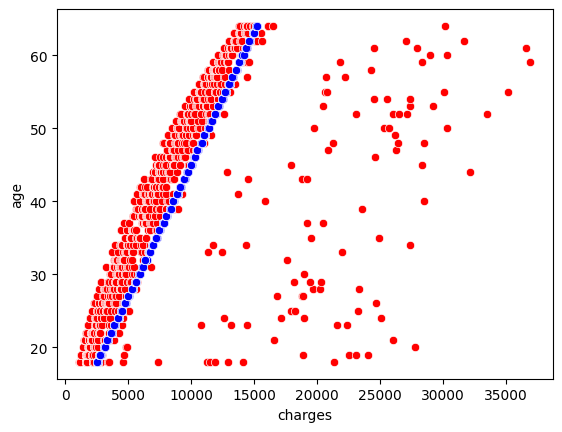

In [70]:
sns.scatterplot (data=df_non_smoker, x='charges', y='age', color='red')
sns.scatterplot (data=df_non_smoker, x='prediction', y='age', color='blue')

plt.show()

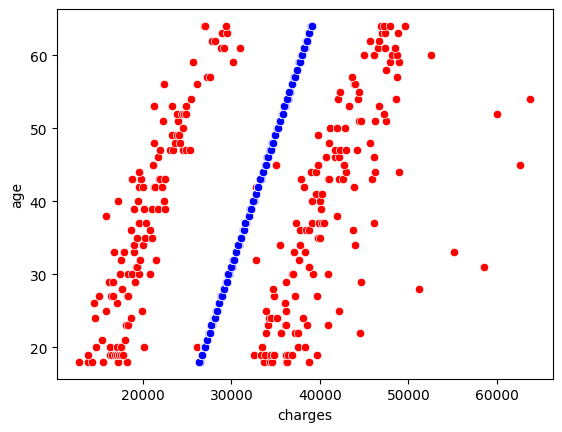

In [66]:
sns.scatterplot (data=df_smoker, x='charges', y='age', color='red')
sns.scatterplot (data=df_smoker, x='prediction', y='age', color='blue')

plt.show()

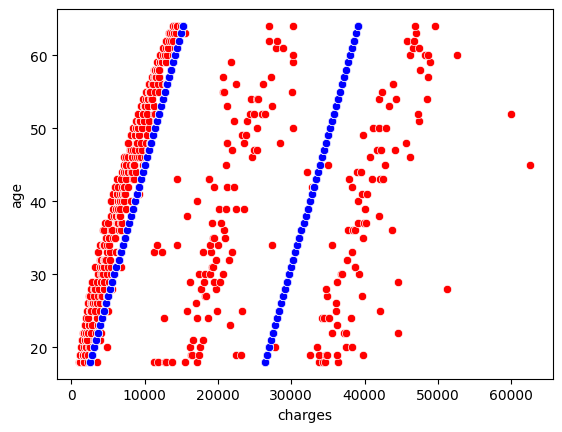

In [71]:
sns.scatterplot (data=df_female, x='charges', y='age', color='red')
sns.scatterplot (data=df_female, x='prediction', y='age', color='blue')

plt.show()

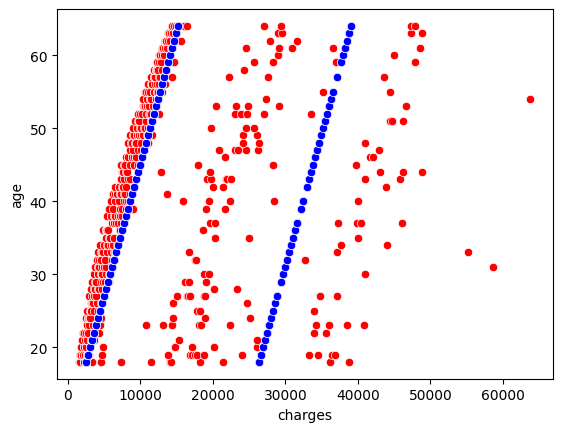

In [72]:
sns.scatterplot (data=df_male, x='charges', y='age', color='red')
sns.scatterplot (data=df_male, x='prediction', y='age', color='blue')

plt.show()

In [77]:
predict = regression.predict([[36, 0, 0]])
print(f'the amount to pay for health insurance if you are a 36 years old masculine non smoker guy is: {round(float(predict), 2)} USD')

the amount to pay for health insurance if you are a 36 years old masculine non smoker guy is: 7545.62 USD


c:\Users\fchav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
